In [1]:
import numpy as np
import updated_library as gbc

import seaborn as sns
sns.set()
#sns.set_style("whitegrid", {'axes.grid' : False})


import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300

In [2]:
# file paths

bumps_family = "../newdat/bumps_by_r/"

wall_family = "../newdat/bumps_by_h/"

wall_family_W = "../newdat/bumps_by_w/"

wall_over_bumps = "../newdat/wall_over_bumps/"

semicirc_family = "../newdat/semicircles/"

semicirc_focus_family = "../newdat/semicircles_focus/"

paper_family = "../newdat/two_competing_curves/"

three_bumps_family = "../newdat/three_bumps/"

bumps_with_flat = "../newdat/bumps_with_flat/"

In [3]:
# observables
sph_obs = lambda x: 2*x - np.pi
cha_obs = lambda x, rad, cut: np.clip(a=2*rad/np.tan(x), a_min=-cut, a_max=cut)
#cha_obs = lambda x, rad, cut: cut if 2*rad/np.tan(x)>cut else (-cut if 2*rad/np.tan(x)<-cut else 2*rad/np.tan(x)>cut)
c_ = 5*(10**4)
#c_ = 5
knudsen_channel = gbc.channel_var(c_, 1/2)

img_path_ = "../../AllWriteUps/Thesis/imgs/"

# Bumps from Paper

In [7]:
P_stacks = np.load(paper_family + "p_mats.npy", allow_pickle=False)
params = np.load(paper_family + "keys.npy", allow_pickle=False)
theta_partition = np.load(paper_family + "theta_partition.npy", allow_pickle=False)

In [8]:
p_heights_ = params[:,0]

for h_ in [-0.2, 0, 0.2]:
    gbc.plot_segments(gbc.arc_with_arc_walls(
        radius_=2,
        width_=0.1,
        height_=h_))

In [10]:
cvar_for_bfp, gaps_for_bfp = [], []
for P in P_stacks:
    # compute the variance
    cvar_ = gbc.var_from_P(P_=P, angle_bins_=theta_partition,
                       observable_f=lambda x: cha_obs(x, cut=7, rad=1/2))

    # compute the spectral gap
    spectrum = np.sort(np.real(np.linalg.eigvals(P)))
    second_eig = spectrum[-2]

    # write to array
    cvar_for_bfp.append(cvar_)
    gaps_for_bfp.append(1-second_eig)

In [11]:
acc_coeff_2curves_ch = np.array(cvar_for_bfp[::-1])/knudsen_channel

## Spectral Gap

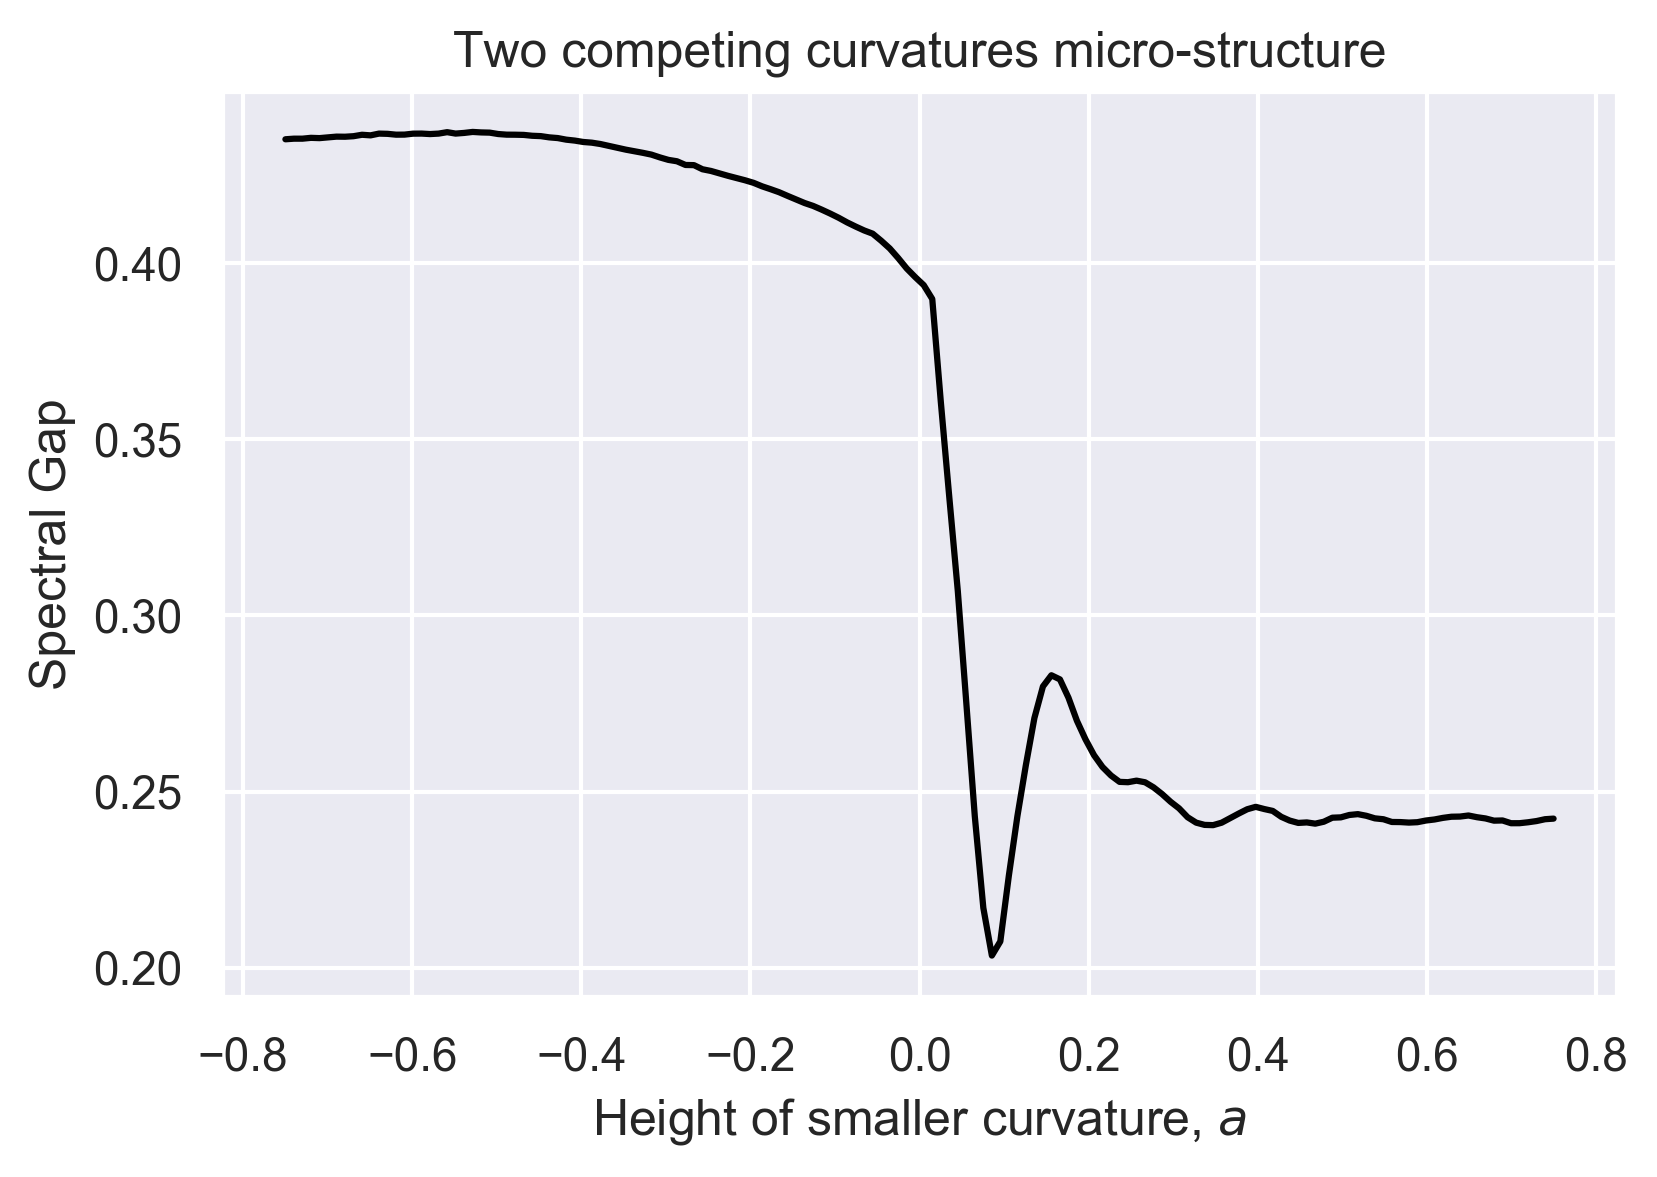

In [8]:
dot_label = "Sampled Points"

#plt.plot(p_heights_, gaps_for_bfp[::-1], '.', c="firebrick", label=dot_label)
plt.plot(p_heights_, gaps_for_bfp[::-1], color="black")

#plt.xl(p_heights_[::-1])
#plt.axvline(0.278, label="Wall Height > Bump", ls="--", lw=0.8)

plt.xlabel(r"Height of smaller curvature, $a$")
plt.ylabel("Spectral Gap")    
    
plt.title("Two competing curvatures micro-structure")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.savefig(filename=img_path_+"two_curves_spectralgap.eps", bbox_inches='tight')
plt.show()

## Variance: channel observable

The observable is 
    $$f(x, r, c)=2r\cot(x),$$
where $r$ is the radius of the channel and $c$ is the maximum distance we cut. Here we take $r=1/2$ and $c=7$. 

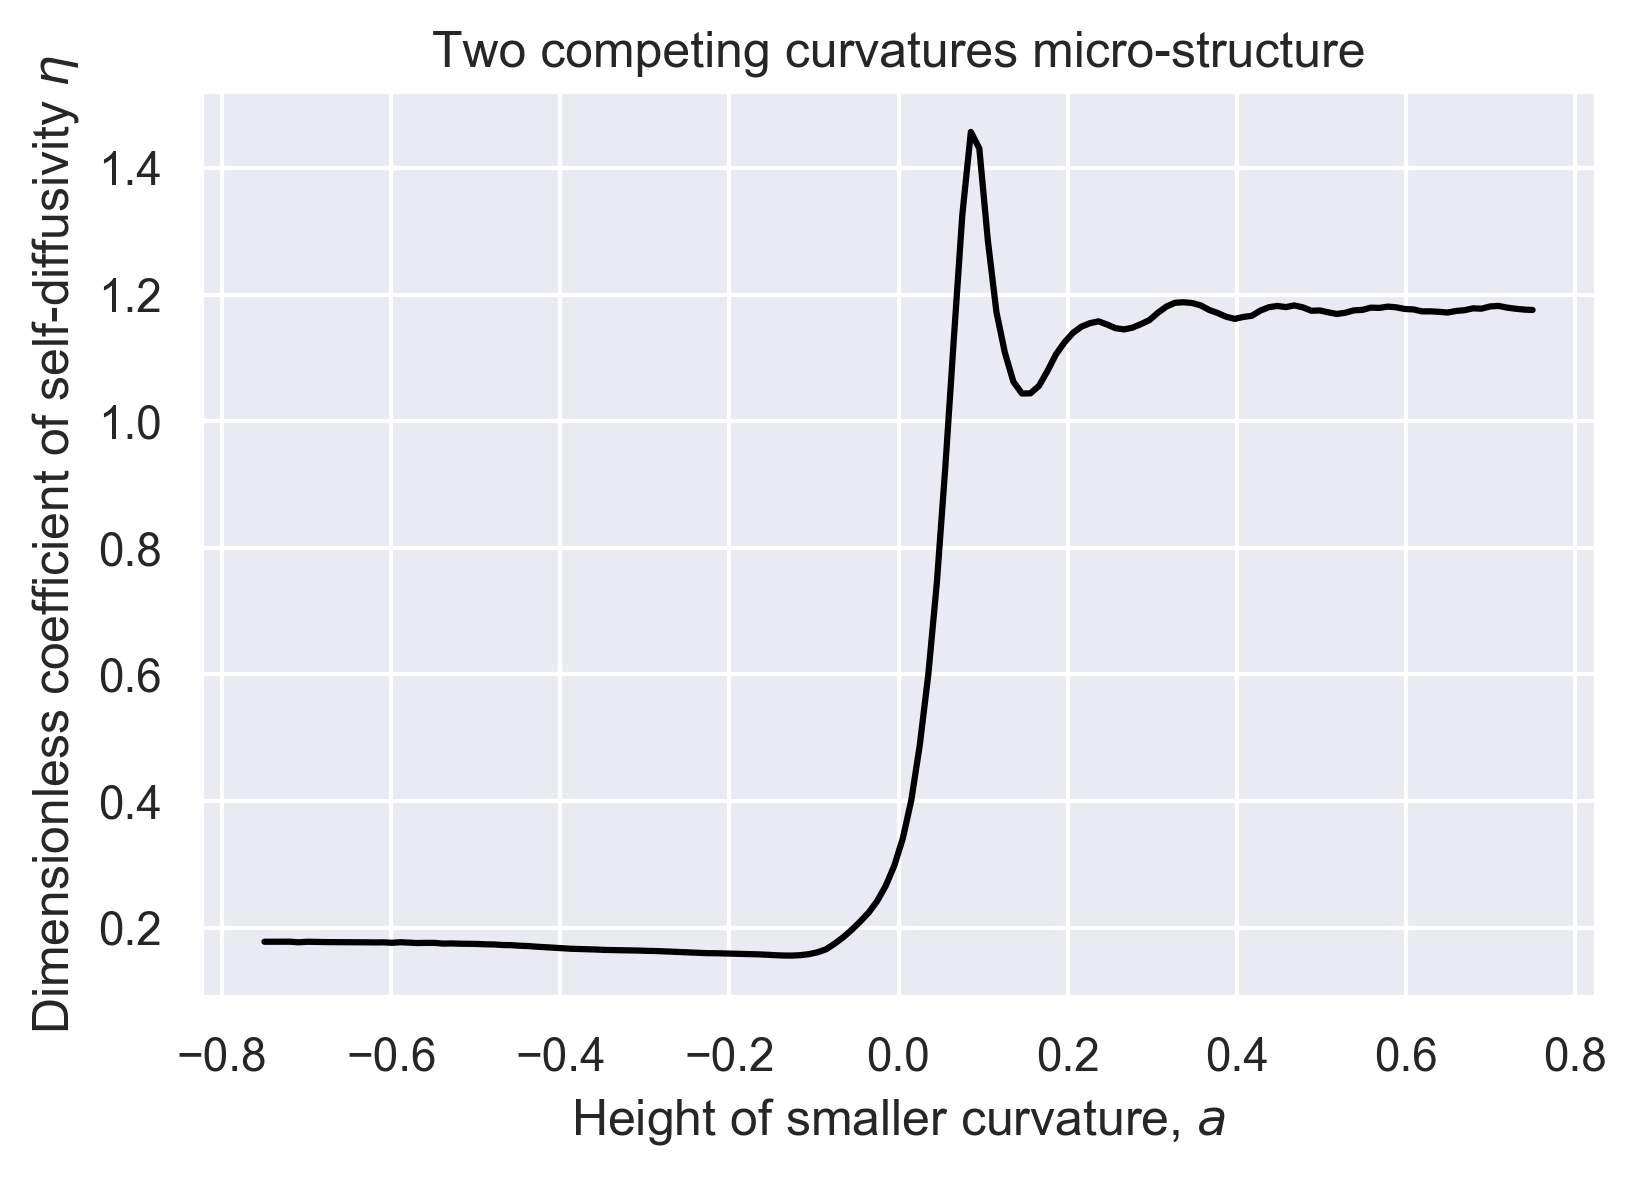

In [9]:
dot_label = "Sampled Points"


#plt.plot(p_heights_, svar_for_bfp[::-1], '.', c="firebrick", label=dot_label)
plt.plot(p_heights_, acc_coeff_2curves_ch, color="black")
#plt.axvline(0.278, label="Wall Height > Bump", ls="--", lw=0.8)    
dot_label = "_nolegend_"
    
plt.xlabel(r"Height of smaller curvature, $a$")
plt.ylabel(r"Dimensionless coefficient of self-diffusivity $\eta$")   
plt.title("Two competing curvatures micro-structure")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.savefig(filename=img_path_+"two_curves_varch.eps", bbox_inches='tight')
plt.show()

## Both Variance and Spectral Gap

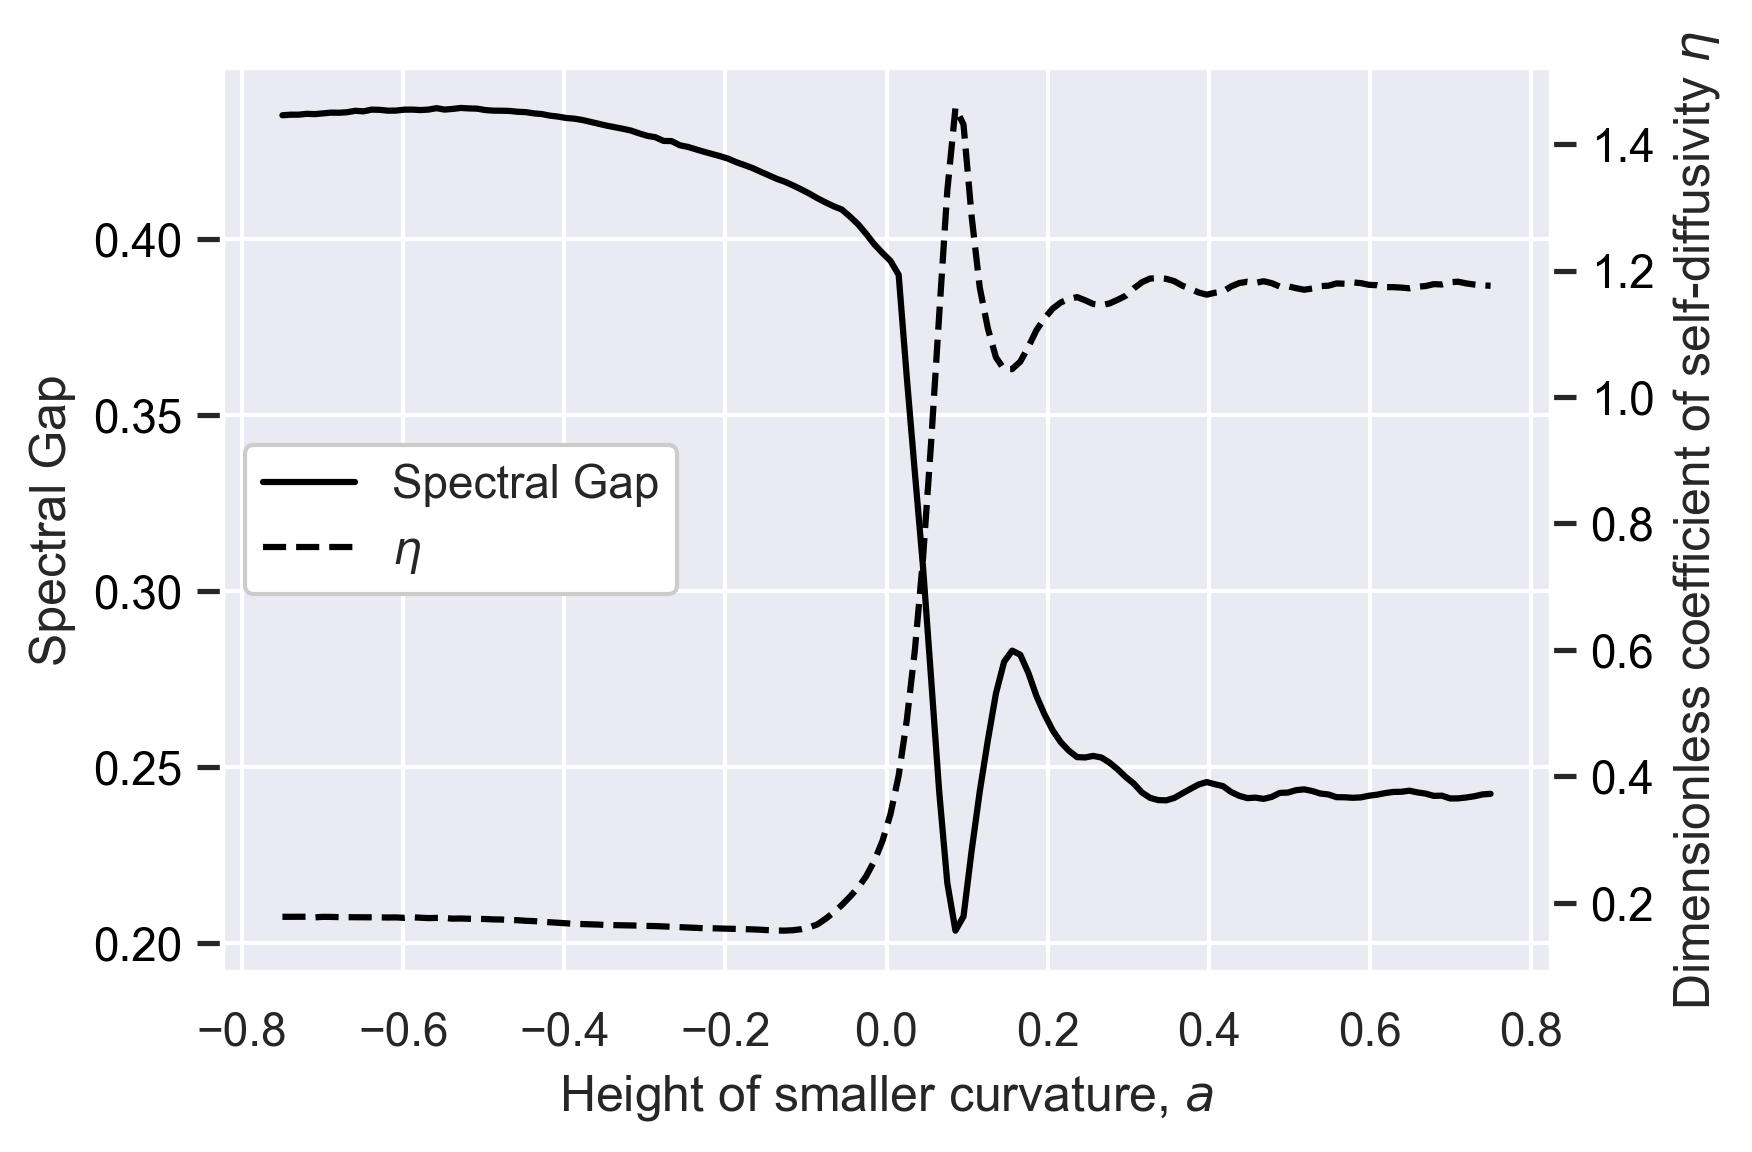

In [11]:
fig, ax1 = plt.subplots()

color = 'tab:red'

ax1.set_xlabel(r"Height of smaller curvature, $a$")
ax1.set_ylabel('Spectral Gap')

A1 = ax1.plot(
    p_heights_,
    gaps_for_bfp[::-1],
    color="black",
    label="Spectral Gap"
)
ax1.tick_params(axis='y', labelcolor="black")
ax1.legend(loc='center left')



ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.grid(False)

color = 'tab:blue'
ax2.set_ylabel(r'Dimensionless coefficient of self-diffusivity $\eta$')  # we already handled the x-label with ax1
A2 = ax2.plot(
    p_heights_,
    acc_coeff_2curves_ch,
    color="black", 
    ls="--",
    label=r"$\eta$"
)
ax2.tick_params(axis='y', labelcolor="black")
#ax2.legend(loc='center right')

# added these three lines
lns = A1+A2
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc='center left', facecolor='white', framealpha=1)


fig.tight_layout()  # otherwise the right y-label is slightly clipped

#plt.title(r"Spectral gap and $\eta$ for the two curvature family")

plt.savefig(filename=img_path_+"two_curves_both.eps", bbox_inches='tight')
plt.show()

# for DEFENSE

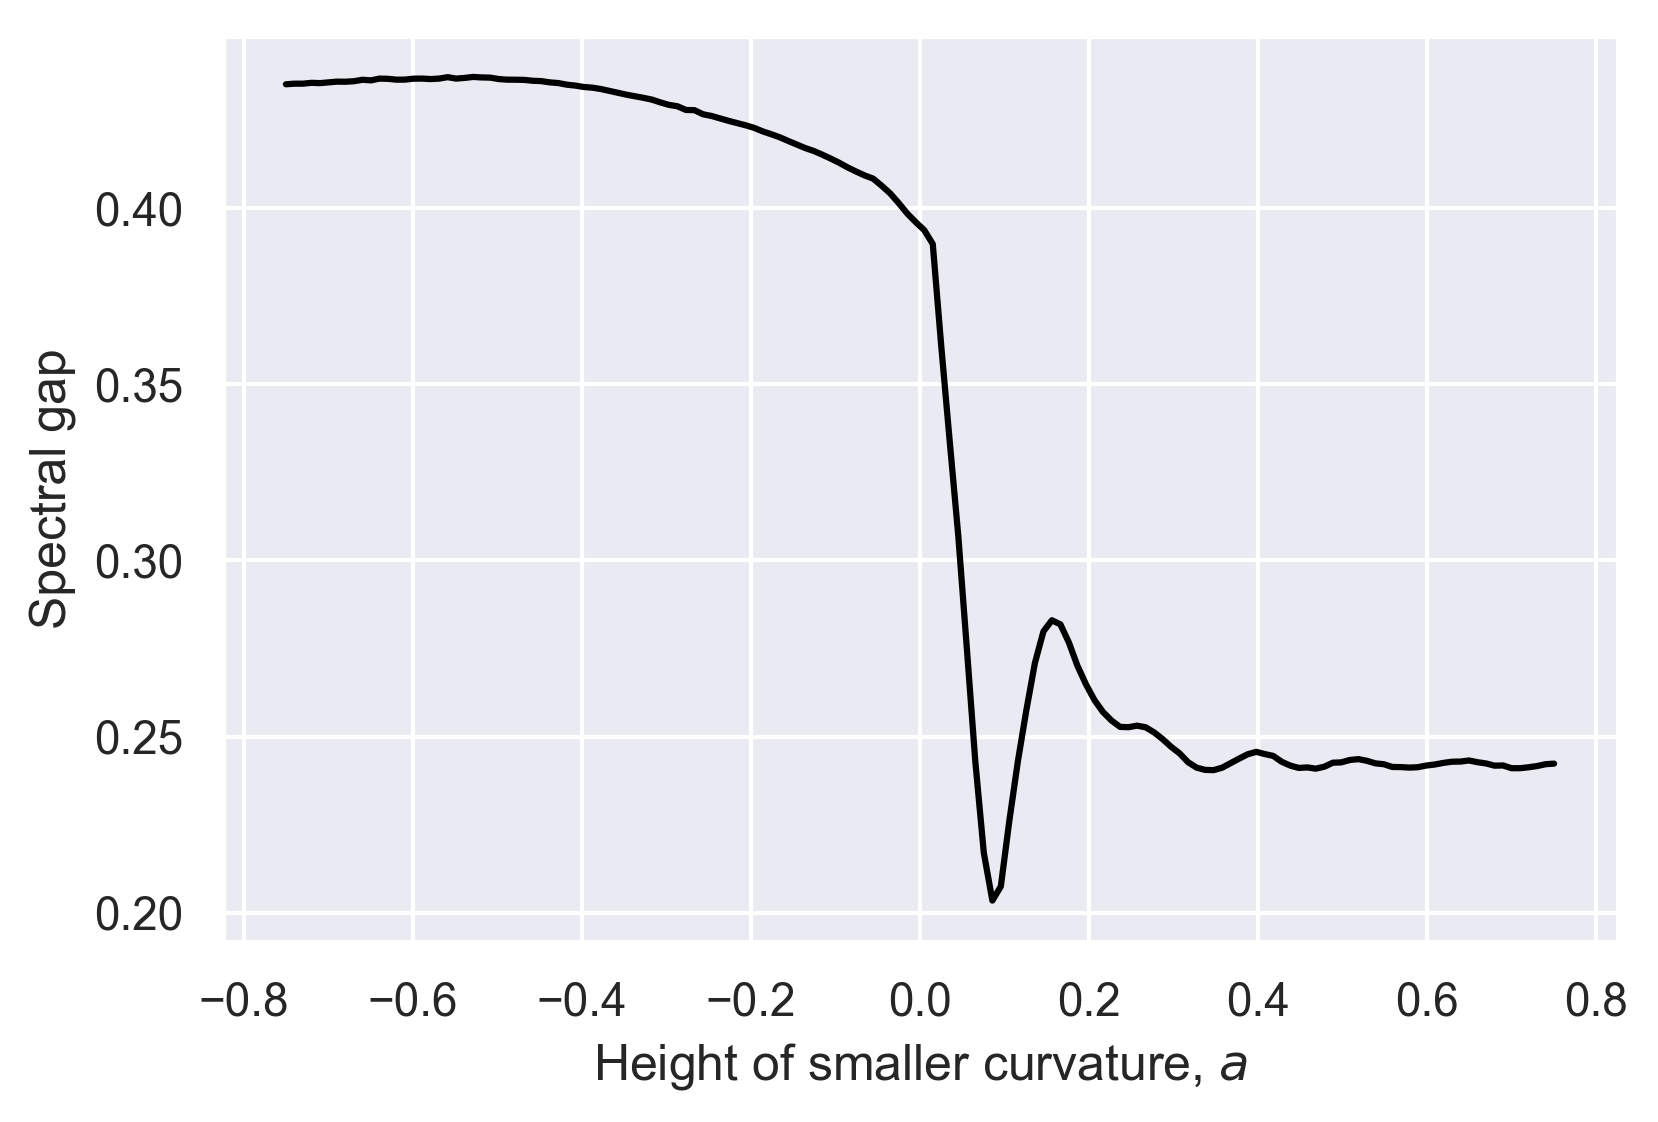

In [12]:
dot_label = "Sampled Points"

#plt.plot(p_heights_, gaps_for_bfp[::-1], '.', c="firebrick", label=dot_label)
plt.plot(p_heights_, gaps_for_bfp[::-1], color="black")

#plt.xl(p_heights_[::-1])
#plt.axvline(0.278, label="Wall Height > Bump", ls="--", lw=0.8)

plt.xlabel(r"Height of smaller curvature, $a$")
plt.ylabel("Spectral gap")    
    
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.savefig(filename=img_path_+"defense_two_curves_gap.eps", bbox_inches='tight')
plt.show()

## Variance: channel observable

The observable is 
    $$f(x, r, c)=2r\cot(x),$$
where $r$ is the radius of the channel and $c$ is the maximum distance we cut. Here we take $r=1/2$ and $c=7$. 

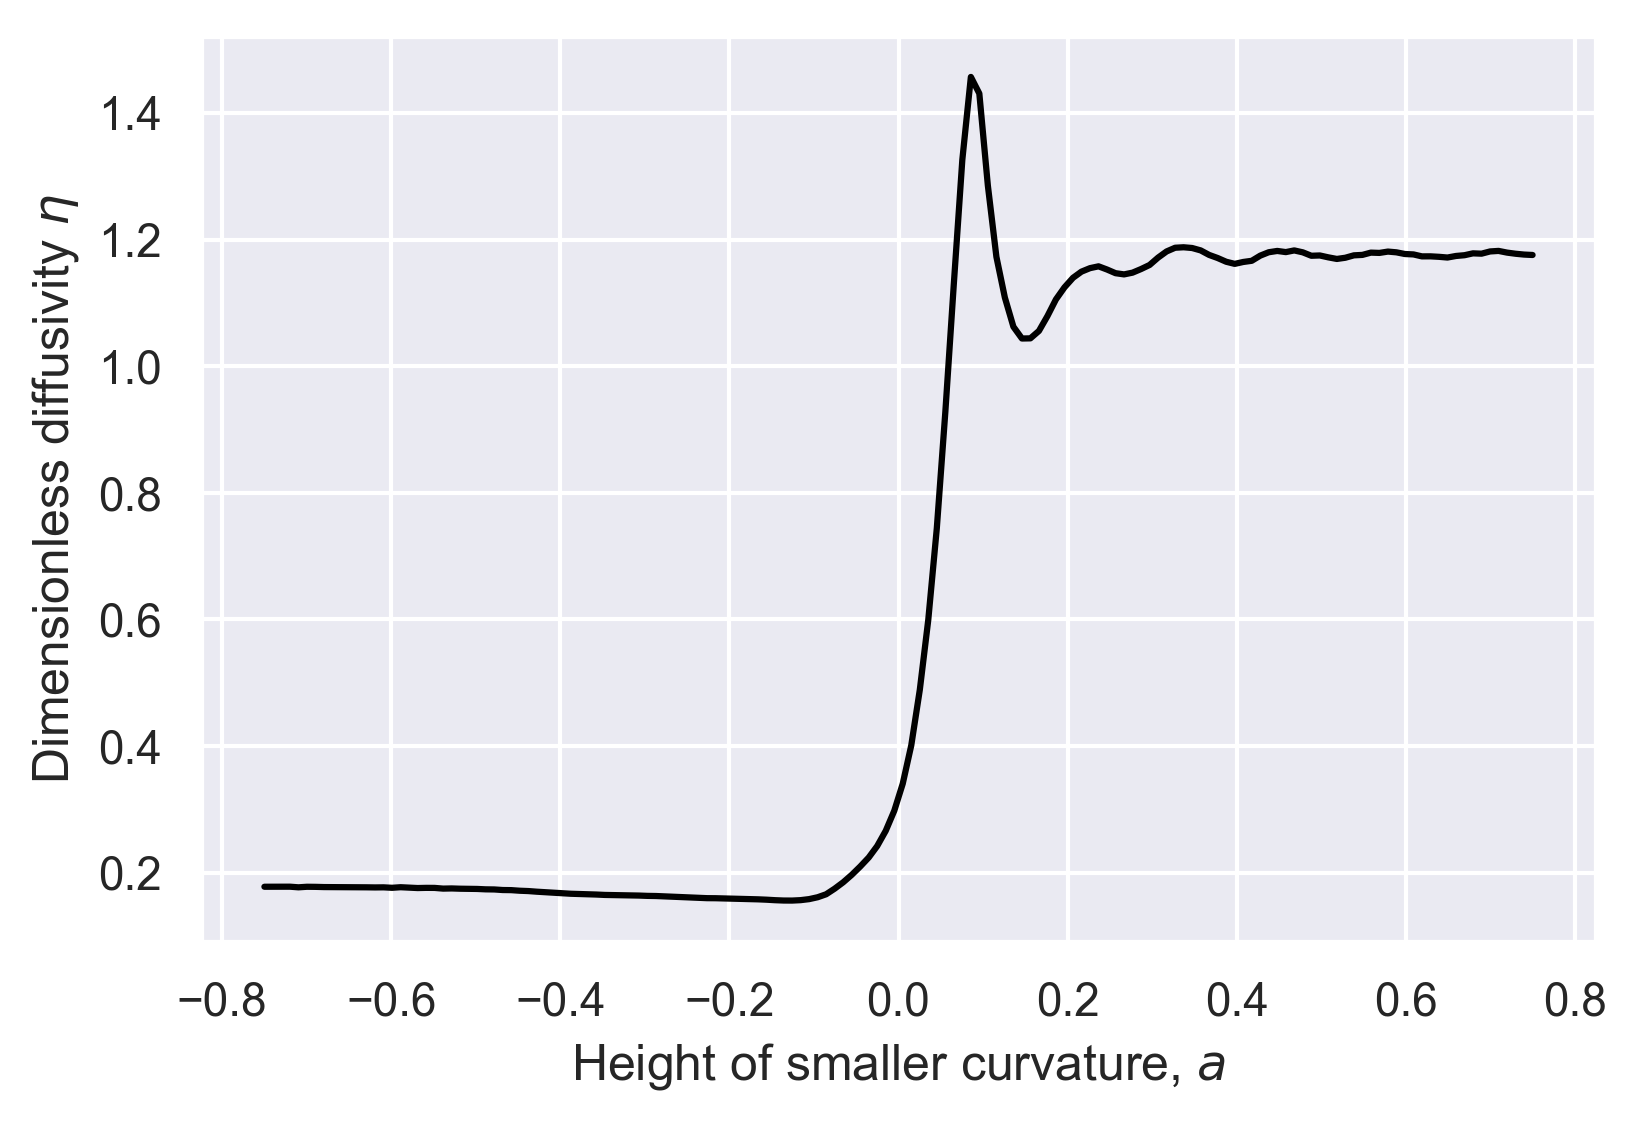

In [15]:
dot_label = "Sampled Points"


#plt.plot(p_heights_, svar_for_bfp[::-1], '.', c="firebrick", label=dot_label)
plt.plot(p_heights_, acc_coeff_2curves_ch, color="black")
#plt.axvline(0.278, label="Wall Height > Bump", ls="--", lw=0.8)    
dot_label = "_nolegend_"
    
plt.xlabel(r"Height of smaller curvature, $a$")
plt.ylabel(r"Dimensionless diffusivity $\eta$")   
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.savefig(filename=img_path_+"defense_two_curves_eta.eps", bbox_inches='tight')
plt.show()

## Both Variance and Spectral Gap

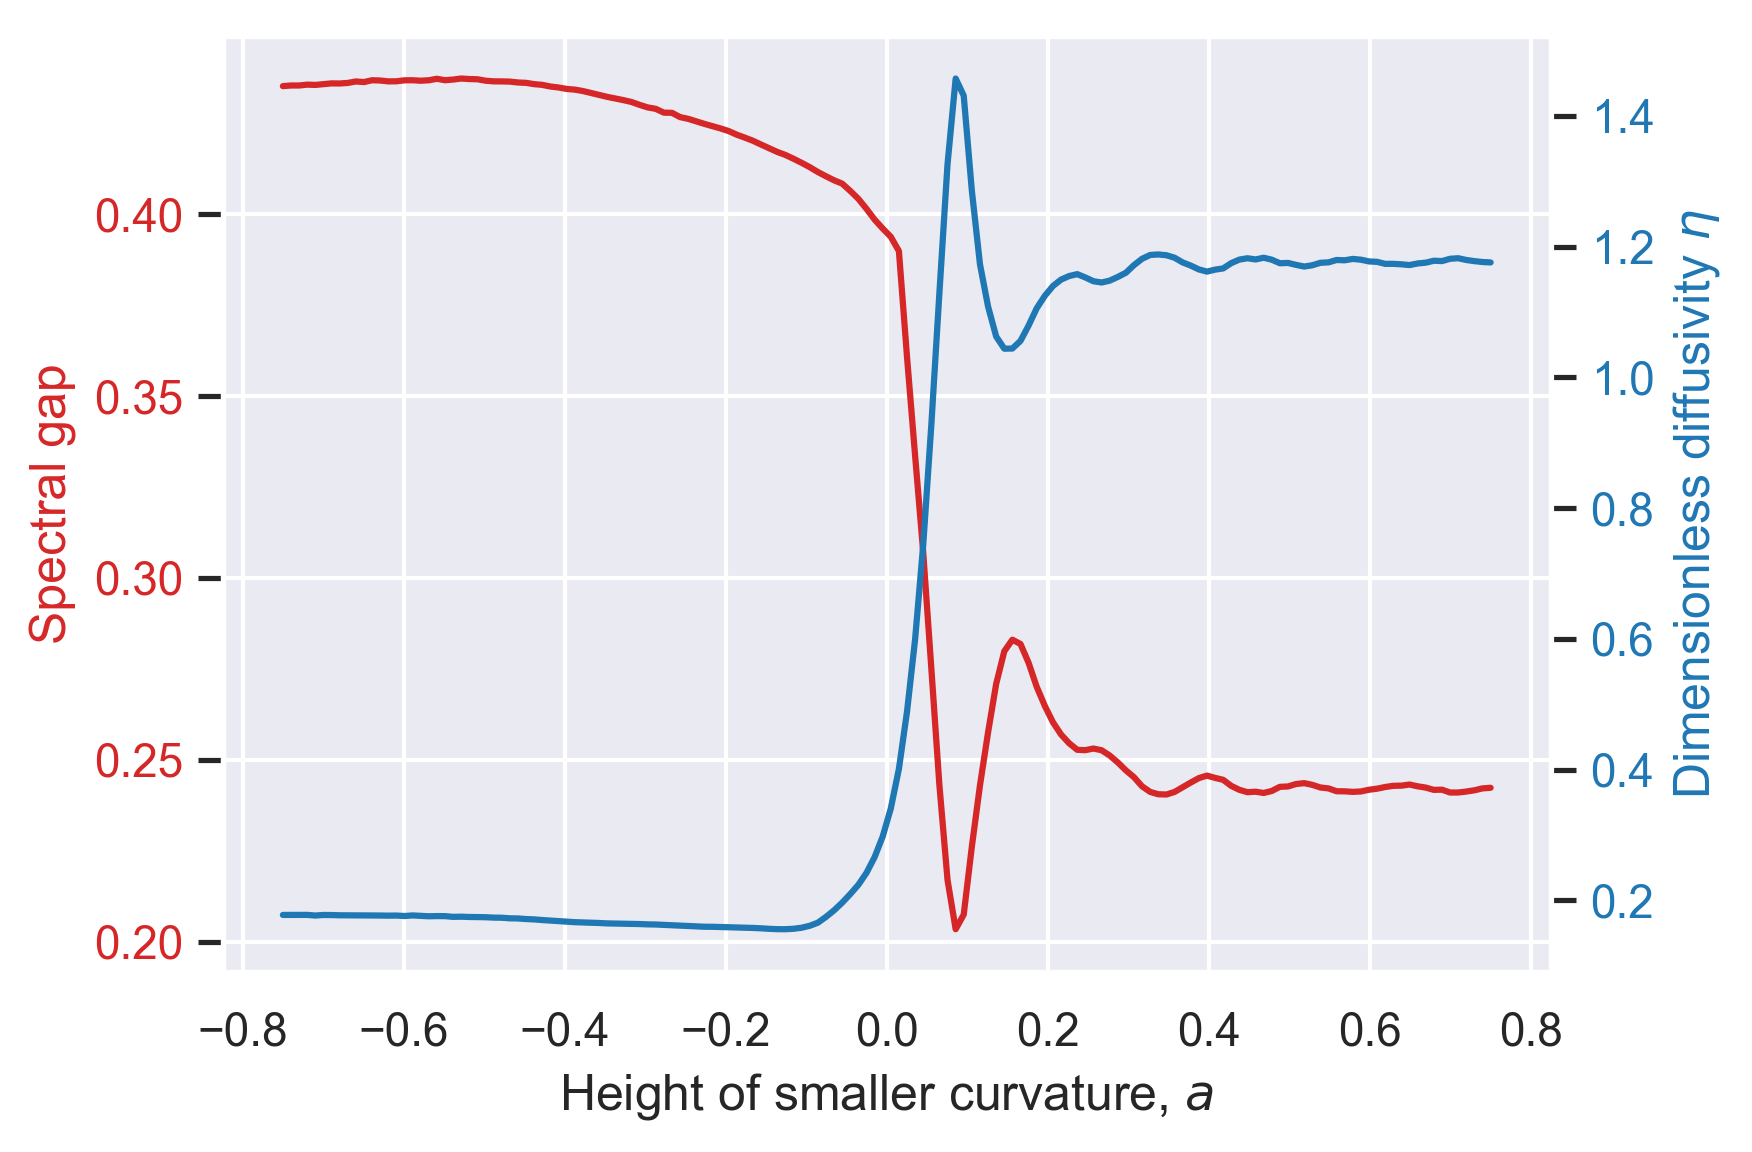

In [20]:
fig, ax1 = plt.subplots()

color1 = 'tab:red'

ax1.set_xlabel(r"Height of smaller curvature, $a$")
ax1.set_ylabel('Spectral gap', color=color1)

A1 = ax1.plot(
    p_heights_,
    gaps_for_bfp[::-1],
    color=color1,
    label="Spectral Gap"
)
ax1.tick_params(axis='y', labelcolor=color1)
#ax1.legend(loc='center left')



ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.grid(False)

color2 = 'tab:blue'
ax2.set_ylabel(r'Dimensionless diffusivity $\eta$', color=color2)  # we already handled the x-label with ax1
A2 = ax2.plot(
    p_heights_,
    acc_coeff_2curves_ch,
    color=color2, 
    ls="-",
    label=r"$\eta$"
)
ax2.tick_params(axis='y', labelcolor=color2)
#ax2.legend(loc='center right')

# added these three lines
lns = A1+A2
labs = [l.get_label() for l in lns]
#ax1.legend(lns, labs, loc='center left', facecolor='white', framealpha=1)


fig.tight_layout()  # otherwise the right y-label is slightly clipped

#plt.title(r"Spectral gap and $\eta$ for the two curvature family")

plt.savefig(filename=img_path_+"defense_two_curves_both.eps", bbox_inches='tight')
plt.show()